In [2]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from math import sqrt
from sklearn.linear_model import LassoCV, LassoLarsCV, Lasso, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from google.colab import drive, files 
drive.mount('/content.drive')

Mounted at /content.drive


# Classifier

# RF

In [4]:
train = pd.read_csv('/content.drive/MyDrive/UIUC/MLTP/Classification/DATA/final_train.csv')
test = pd.read_csv('/content.drive/MyDrive/UIUC/MLTP/Classification/DATA/final_test.csv')
dropp = ['Unnamed: 0']
train = train.drop(dropp,axis=1)
test = test.drop(dropp,axis=1)

In [5]:
x = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y = train['class']

In [ ]:
# rf = RandomForestClassifier()
# rf_pa = {
#     'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
#     'min_samples_split': [2,5,10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'max_features': ['auto', 'sqrt'],
#     'min_weight_fraction_leaf': [0.001,0.002,0.0025,0.0035,0.005,0.025,0.05,0.01,0.1,0.25]
# }

# rf_grid = RandomizedSearchCV(rf, rf_pa, cv = StratifiedKFold(n_splits = 4), scoring = 'f1_weighted', n_jobs = 1)
# rf_grid.fit(x, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_sp...
                     

In [ ]:
# print('Best cv accuracy: {}' .format(rf_grid.best_score_))
# print('Test set score:   {}' .format(rf_grid.score(x, y)))
# print('Best parameters:  {}' .format(rf_grid.best_params_))

Best cv accuracy: 0.8495410013267156
Test set score:   0.9940207546590526
Best parameters:  {'n_estimators': 1200, 'min_weight_fraction_leaf': 0.0025, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



F1_test 0.8637359943977592
F1_train 0.9839919128602791
Accuracy_test 0.875
Accuracy_train 0.9841277448588357
Precision_test 0.8863664215686274
Precision_train 0.9849136406102067
Recall_test 0.875
Recall_train 0.9841277448588357


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



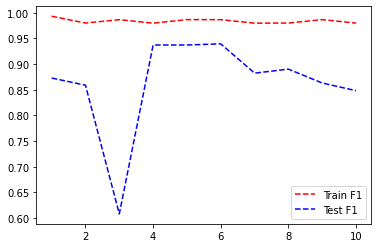

In [6]:
f1_rf_test = []
f1_rf_train = []
acc_rf_test = []
acc_rf_train = []
pre_rf_test = []
pre_rf_train = []
re_rf_test = []
re_rf_train = []

kf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    rf = RandomForestClassifier(n_estimators = 3000, min_samples_split = 9, min_samples_leaf = 2,
                                max_features = 'sqrt', max_depth = 75, bootstrap = False, min_weight_fraction_leaf = 0.025)

    rf.fit(x_train, y_train)
    predicted = rf.predict(x_test)

    pred_train = rf.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_rf_test.append(f1_test)
    f1_rf_train.append(f1_train)

    acc_rf_test.append(acc_test)   
    acc_rf_train.append(acc_train) 

    pre_rf_test.append(pre_test)   
    pre_rf_train.append(pre_train)

    re_rf_test.append(re_test)   
    re_rf_train.append(re_train)

print('F1_test',np.mean(f1_rf_test))
print('F1_train', np.mean(f1_rf_train))
print('Accuracy_test',np.mean(acc_rf_test))
print('Accuracy_train', np.mean(acc_rf_train))
print('Precision_test',np.mean(pre_rf_test))
print('Precision_train', np.mean(pre_rf_train))
print('Recall_test',np.mean(re_rf_test))
print('Recall_train', np.mean(re_rf_train))

rff = {
    'Fold': pd.Series([1,2,3,4,5,6,7,8,9,10]),
    'Train_F1': pd.Series(f1_rf_train),
    'Test_F1': pd.Series(f1_rf_test)
}
rf_fitting = pd.DataFrame(rff)

plt.plot(rf_fitting['Fold'], rf_fitting['Train_F1'], 'r--', rf_fitting['Fold'], rf_fitting['Test_F1'], 'b--')
# plt.ylim((0.40,0.50))
plt.legend(['Train F1', 'Test F1'])
plt.show()

In [7]:
x_train = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
x_test = test[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y_train = train['class']
y_test = test['class']

              precision    recall  f1-score   support

    asphalt      0.9211    0.7778    0.8434        45
   building      0.7449    0.7526    0.7487        97
        car      0.3846    0.9524    0.5479        21
   concrete      0.8551    0.6344    0.7284        93
      grass      0.6972    0.9157    0.7917        83
       pool      0.9167    0.7857    0.8462        14
     shadow      0.7885    0.9111    0.8454        45
       soil      0.5263    0.5000    0.5128        20
       tree      0.9483    0.6180    0.7483        89

    accuracy                         0.7495       507
   macro avg     0.7536    0.7608    0.7347       507
weighted avg     0.7937    0.7495    0.7540       507



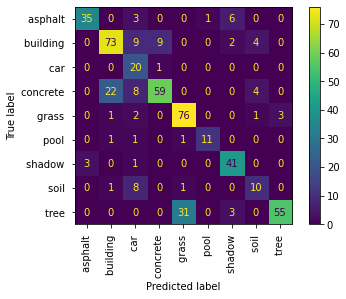

In [8]:
rf = RandomForestClassifier(n_estimators = 3000, min_samples_split = 9, min_samples_leaf = 2,
                                max_features = 'sqrt', max_depth = 75, bootstrap = False, min_weight_fraction_leaf = 0.025)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

print(metrics.classification_report(y_test, rf_pred, digits = 4))
metrics.plot_confusion_matrix(rf, x_test, y_test, xticks_rotation = 'vertical')

# KNN

In [9]:
x = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y = train['class']

In [ ]:
# knn = KNeighborsClassifier(n_jobs = -1)
# knn_pa = {
#     'n_neighbors': [2,3,4,5,6,7,8,9,10,12,14,15],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': [1,3,5,6, 10, 30,40,50,60,70],
#     'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
# }

# knn_grid = RandomizedSearchCV(knn, knn_pa, cv = StratifiedKFold(n_splits = 4), scoring = 'f1_weighted', n_jobs = 1)
# knn_grid.fit(x, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None, n_jobs=-1,
                                                  n_neighbors=5, p=2,
                                                  weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 3, 5, 6, 10, 30, 40,
                                                      50, 60, 70],
                                        'metric': ['euclidean', 'manhattan',
                          

In [ ]:
# print('Best cv accuracy: {}' .format(knn_grid.best_score_))
# print('Test set score:   {}' .format(knn_grid.score(x, y)))
# print('Best parameters:  {}' .format(knn_grid.best_params_))

Best cv accuracy: 0.8542109180502038
Test set score:   1.0
Best parameters:  {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 3, 'algorithm': 'ball_tree'}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



F1_test 0.8575525210084033
F1_train 0.9081506673831896
Accuracy_test 0.8698529411764706
Accuracy_train 0.9080646566747994
Precision_test 0.8832904411764705
Precision_train 0.9129730657796769
Recall_test 0.8698529411764706
Recall_train 0.9080646566747994


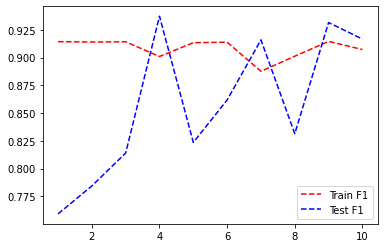

In [10]:
f1_knn_test = []
f1_knn_train = []
acc_knn_test = []
acc_knn_train = []
pre_knn_test = []
pre_knn_train = []
re_knn_test = []
re_knn_train = []

kf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', leaf_size = 3, algorithm = 'ball_tree', metric = 'manhattan')

    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)

    pred_train = knn.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_knn_test.append(f1_test)
    f1_knn_train.append(f1_train)

    acc_knn_test.append(acc_test)   
    acc_knn_train.append(acc_train) 

    pre_knn_test.append(pre_test)   
    pre_knn_train.append(pre_train)

    re_knn_test.append(re_test)   
    re_knn_train.append(re_train)

print('F1_test',np.mean(f1_knn_test))
print('F1_train', np.mean(f1_knn_train))
print('Accuracy_test',np.mean(acc_knn_test))
print('Accuracy_train', np.mean(acc_knn_train))
print('Precision_test',np.mean(pre_knn_test))
print('Precision_train', np.mean(pre_knn_train))
print('Recall_test',np.mean(re_knn_test))
print('Recall_train', np.mean(re_knn_train))

knnf = {
    'Fold': pd.Series([1,2,3,4,5,6,7,8,9,10]),
    'Train_F1': pd.Series(f1_knn_train),
    'Test_F1': pd.Series(f1_knn_test)
}
knn_fitting = pd.DataFrame(knnf)

plt.plot(knn_fitting['Fold'], knn_fitting['Train_F1'], 'r--', knn_fitting['Fold'], knn_fitting['Test_F1'], 'b--')
# plt.ylim((0.40,0.50))
plt.legend(['Train F1', 'Test F1'])
plt.show()

In [11]:
x_train = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
x_test = test[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y_train = train['class']
y_test = test['class']

              precision    recall  f1-score   support

    asphalt      0.9231    0.8000    0.8571        45
   building      0.8333    0.7732    0.8021        97
        car      0.7143    0.9524    0.8163        21
   concrete      0.7867    0.6344    0.7024        93
      grass      0.7234    0.8193    0.7684        83
       pool      1.0000    0.8571    0.9231        14
     shadow      0.7963    0.9556    0.8687        45
       soil      0.3056    0.5500    0.3929        20
       tree      0.8354    0.7416    0.7857        89

    accuracy                         0.7692       507
   macro avg     0.7687    0.7871    0.7685       507
weighted avg     0.7907    0.7692    0.7740       507



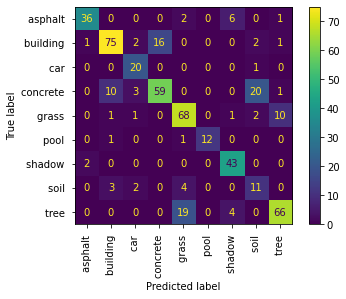

In [12]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', leaf_size = 3, algorithm = 'ball_tree', metric = 'manhattan')
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print(metrics.classification_report(y_test, knn_pred, digits = 4))
metrics.plot_confusion_matrix(knn, x_test, y_test, xticks_rotation = 'vertical')

# SVM

In [13]:

x = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y = train['class']

In [ ]:
# CLA = SVC(degree=3)
# CLA_pa = {
#     'C': np.arange(0.005, 30),
#     'gamma': ['scale', 'auto'],
#     'max_iter': [2,20,200,1000,2000,5000,10000,50000,100000,900000,1000000],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
# }

# svm_grid = RandomizedSearchCV(CLA, CLA_pa, cv = StratifiedKFold(n_splits = 4), scoring = 'f1_weighted', n_jobs = 1)
# svm_grid.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n...
       2.0005e+01, 2.1005e+01, 2.2005e+01, 2.3005e+01, 2.4005e+01,
       2.5005e+01, 2.6005e+01, 2.7005e+01, 2.8005e+01, 2.9005e+01]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precomputed'],
                                        'max_i

In [ ]:
# print('Best cv accuracy: {}' .format(svm_grid.best_score_))
# print('Test set score:   {}' .format(svm_grid.score(x, y)))
# print('Best parameters:  {}' .format(svm_grid.best_params_))

Best cv accuracy: 0.8643663875806732
Test set score:   0.964133206832414
Best parameters:  {'max_iter': 10000, 'kernel': 'rbf', 'gamma': 'scale', 'C': 3.0049999999999994}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



F1_test 0.8766596638655463
F1_train 0.9648683217990955
Accuracy_test 0.8871323529411764
Accuracy_train 0.9649398745207389
Precision_test 0.9024264705882352
Precision_train 0.9660049117965451
Recall_test 0.8871323529411764
Recall_train 0.9649398745207389


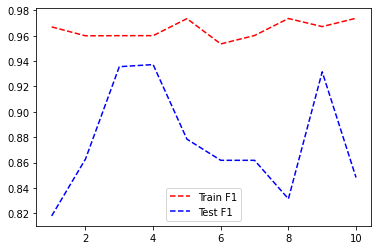

In [14]:
f1_svm_test = []
f1_svm_train = []
acc_svm_test = []
acc_svm_train = []
pre_svm_test = []
pre_svm_train = []
re_svm_test = []
re_svm_train = []

kf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    classifier = SVC(max_iter = 10000, kernel = 'rbf', gamma = 'scale', C = 3)

    classifier.fit(x_train, y_train)
    predicted = classifier.predict(x_test)

    pred_train = classifier.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_svm_test.append(f1_test)
    f1_svm_train.append(f1_train)

    acc_svm_test.append(acc_test)   
    acc_svm_train.append(acc_train) 

    pre_svm_test.append(pre_test)   
    pre_svm_train.append(pre_train)

    re_svm_test.append(re_test)   
    re_svm_train.append(re_train)

print('F1_test',np.mean(f1_svm_test))
print('F1_train', np.mean(f1_svm_train))
print('Accuracy_test',np.mean(acc_svm_test))
print('Accuracy_train', np.mean(acc_svm_train))
print('Precision_test',np.mean(pre_svm_test))
print('Precision_train', np.mean(pre_svm_train))
print('Recall_test',np.mean(re_svm_test))
print('Recall_train', np.mean(re_svm_train))

svmf = {
    'Fold': pd.Series([1,2,3,4,5,6,7,8,9,10]),
    'Train_F1': pd.Series(f1_svm_train),
    'Test_F1': pd.Series(f1_svm_test)
}
svm_fitting = pd.DataFrame(svmf)

plt.plot(svm_fitting['Fold'], svm_fitting['Train_F1'], 'r--', svm_fitting['Fold'], svm_fitting['Test_F1'], 'b--')
# plt.ylim((0.40,0.50))
plt.legend(['Train F1', 'Test F1'])
plt.show()

In [15]:
x_train = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
x_test = test[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y_train = train['class']
y_test = test['class']

              precision    recall  f1-score   support

    asphalt      0.9706    0.7333    0.8354        45
   building      0.9189    0.7010    0.7953        97
        car      0.5882    0.9524    0.7273        21
   concrete      0.7449    0.7849    0.7644        93
      grass      0.7556    0.8193    0.7861        83
       pool      0.8667    0.9286    0.8966        14
     shadow      0.7500    0.9333    0.8317        45
       soil      0.3636    0.4000    0.3810        20
       tree      0.8452    0.7978    0.8208        89

    accuracy                         0.7811       507
   macro avg     0.7560    0.7834    0.7598       507
weighted avg     0.7999    0.7811    0.7830       507



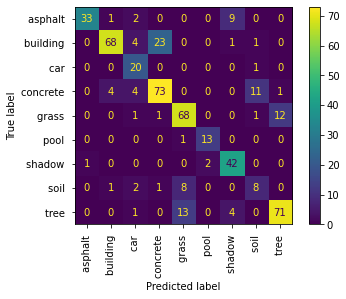

In [16]:
classifier = SVC(max_iter = 10000, kernel = 'rbf', gamma = 'scale', C = 3)
classifier.fit(x_train, y_train)
classifier_pred = classifier.predict(x_test)

print(metrics.classification_report(y_test, classifier_pred, digits = 4))
metrics.plot_confusion_matrix(classifier, x_test, y_test, xticks_rotation = 'vertical')

# SDG

In [17]:
x = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y = train['class']

In [ ]:
# SGDC = SGDClassifier(loss = 'log', n_jobs = -1)
# SGDC_pa = {
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
#     'eta0': [1, 10, 100]

# }

# SGD_grid = RandomizedSearchCV(SGDC, SGDC_pa, cv = StratifiedKFold(n_splits = 4), scoring = 'f1_weighted', n_jobs = 1)
# SGD_grid.fit(x, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=-1, penalty='l2', power_t=0.5,
                                           rando...shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   par

In [ ]:
# print('Best cv accuracy: {}' .format(SGD_grid.best_score_))
# print('Test set score:   {}' .format(SGD_grid.score(x, y)))
# print('Best parameters:  {}' .format(SGD_grid.best_params_))

Best cv accuracy: 0.7647542229452167
Test set score:   0.7931744927710623
Best parameters:  {'penalty': 'l2', 'eta0': 1, 'alpha': 0.01}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/pytho

F1_test 0.7385189075630251
F1_train 0.8191417880521616
Accuracy_test 0.7727941176470587
Accuracy_train 0.8333130010456605
Precision_test 0.7525306372549019
Precision_train 0.8430634726124195
Recall_test 0.7727941176470587
Recall_train 0.8333130010456605


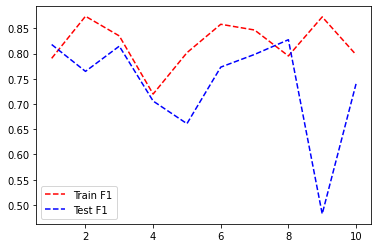

In [18]:
f1_SGD_test = []
f1_SGD_train = []
acc_SGD_test = []
acc_SGD_train = []
pre_SGD_test = []
pre_SGD_train = []
re_SGD_test = []
re_SGD_train = []

kf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    SGD = SGDClassifier(loss = 'log', n_jobs = -1, penalty = 'l2', alpha = 0.01, eta0 = 1)

    SGD.fit(x_train, y_train)
    predicted = SGD.predict(x_test)

    pred_train = SGD.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_SGD_test.append(f1_test)
    f1_SGD_train.append(f1_train)

    acc_SGD_test.append(acc_test)   
    acc_SGD_train.append(acc_train) 

    pre_SGD_test.append(pre_test)   
    pre_SGD_train.append(pre_train)

    re_SGD_test.append(re_test)   
    re_SGD_train.append(re_train)

print('F1_test',np.mean(f1_SGD_test))
print('F1_train', np.mean(f1_SGD_train))
print('Accuracy_test',np.mean(acc_SGD_test))
print('Accuracy_train', np.mean(acc_SGD_train))
print('Precision_test',np.mean(pre_SGD_test))
print('Precision_train', np.mean(pre_SGD_train))
print('Recall_test',np.mean(re_SGD_test))
print('Recall_train', np.mean(re_SGD_train))

sgdf = {
    'Fold': pd.Series([1,2,3,4,5,6,7,8,9,10]),
    'Train_F1': pd.Series(f1_SGD_train),
    'Test_F1': pd.Series(f1_SGD_test)
}
sgd_fitting = pd.DataFrame(sgdf)

plt.plot(sgd_fitting['Fold'], sgd_fitting['Train_F1'], 'r--', sgd_fitting['Fold'], sgd_fitting['Test_F1'], 'b--')
# plt.ylim((0.40,0.50))
plt.legend(['Train F1', 'Test F1'])
plt.show()

In [19]:
x_train = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
x_test = test[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y_train = train['class']
y_test = test['class']

              precision    recall  f1-score   support

    asphalt      0.9600    0.5333    0.6857        45
   building      0.8471    0.7423    0.7912        97
        car      0.5000    0.9048    0.6441        21
   concrete      0.7692    0.8602    0.8122        93
      grass      0.6800    0.8193    0.7432        83
       pool      1.0000    0.8571    0.9231        14
     shadow      0.6562    0.9333    0.7706        45
       soil      1.0000    0.2000    0.3333        20
       tree      0.8267    0.6966    0.7561        89

    accuracy                         0.7554       507
   macro avg     0.8044    0.7274    0.7177       507
weighted avg     0.7908    0.7554    0.7493       507



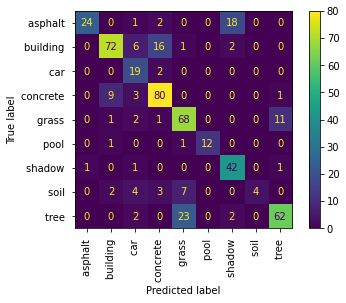

In [20]:
sgd = SGDClassifier(loss = 'log', n_jobs = -1, penalty = 'l2', alpha = 0.01, eta0 = 1)
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)

print(metrics.classification_report(y_test, sgd_pred, digits = 4))
metrics.plot_confusion_matrix(sgd, x_test, y_test, xticks_rotation = 'vertical')


# Decision Tree

In [21]:
x = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y = train['class']

In [ ]:
# dt = DecisionTreeClassifier()
# dt_pa = {
#     'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,300,1000,3000,5000,5500,10000,100000],
#     'criterion': ['gini','entropy'],
#     'min_samples_split': np.arange(1,35),
#     'min_samples_leaf': np.arange(1,15),
#     'max_features': ['auto','log2','sqrt'],
#     'min_weight_fraction_leaf':[0.0001,0.01,0.0025,0.02,0.05]
# }

# dt_grid = RandomizedSearchCV(dt, dt_pa, cv = StratifiedKFold(n_splits = 10), scoring = 'f1_weighted', n_jobs = 1)
# dt_grid.fit(x, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0....
                                        'min_samples_leaf': array([ 1,  2,

In [ ]:
# print('Best cv accuracy: {}' .format(dt_grid.best_score_))
# print('Test set score:   {}' .format(dt_grid.score(x, y)))
# print('Best parameters:  {}' .format(dt_grid.best_params_))

Best cv accuracy: 0.6794782913165267
Test set score:   0.860823025719149
Best parameters:  {'min_weight_fraction_leaf': 0.05, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/pytho

F1_test 0.7907195378151262
F1_train 0.922440913235042
Accuracy_test 0.8088235294117647
Accuracy_train 0.9226124085047054
Precision_test 0.825594362745098
Precision_train 0.931798810466916
Recall_test 0.8088235294117647
Recall_train 0.9226124085047054


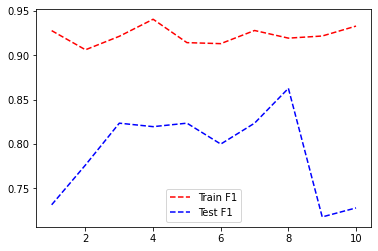

In [22]:
f1_dt_test = []
f1_dt_train = []
acc_dt_test = []
acc_dt_train = []
pre_dt_test = []
pre_dt_train = []
re_dt_test = []
re_dt_train = []

kf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    dt = DecisionTreeClassifier(min_samples_split = 19, min_samples_leaf = 1, max_depth = 10, criterion = 'entropy', min_weight_fraction_leaf = 0.025)

    dt.fit(x_train, y_train)
    predicted = dt.predict(x_test)

    pred_train = dt.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_dt_test.append(f1_test)
    f1_dt_train.append(f1_train)

    acc_dt_test.append(acc_test)   
    acc_dt_train.append(acc_train) 

    pre_dt_test.append(pre_test)   
    pre_dt_train.append(pre_train)

    re_dt_test.append(re_test)   
    re_dt_train.append(re_train)

print('F1_test',np.mean(f1_dt_test))
print('F1_train', np.mean(f1_dt_train))
print('Accuracy_test',np.mean(acc_dt_test))
print('Accuracy_train', np.mean(acc_dt_train))
print('Precision_test',np.mean(pre_dt_test))
print('Precision_train', np.mean(pre_dt_train))
print('Recall_test',np.mean(re_dt_test))
print('Recall_train', np.mean(re_dt_train))

dtf = {
    'Fold': pd.Series([1,2,3,4,5,6,7,8,9,10]),
    'Train_F1': pd.Series(f1_dt_train),
    'Test_F1': pd.Series(f1_dt_test)
}
dt_fitting = pd.DataFrame(dtf)

plt.plot(dt_fitting['Fold'], dt_fitting['Train_F1'], 'r--', dt_fitting['Fold'], dt_fitting['Test_F1'], 'b--')
# plt.ylim((0.40,0.50))
plt.legend(['Train F1', 'Test F1'])
plt.show()

In [23]:
x_train = train[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
x_test = test[['NDVI_40', 'NDVI', 'NDVI_60', 'Mean_R_40', 'BordLngth_60',
       'Mean_NIR_80', 'BrdIndx_80', 'Mean_NIR', 'ShpIndx_60', 'Area_40',
       'Mean_NIR_120', 'Bright', 'Dens_80', 'Compact_80', 'Mean_G',
       'BrdIndx_60', 'Bright_80', 'GLCM1', 'Mean_G_40', 'Compact_120',
       'Mean_R', 'Mean_G_60', 'Compact', 'Dens_40', 'Round_60', 'GLCM2',
       'SD_R_40', 'Mean_R_80', 'SD_G', 'ShpIndx_120', 'BrdIndx_120', 'BrdIndx',
       'Mean_NIR_40', 'SD_NIR', 'Compact_100', 'GLCM2_80', 'SD_G_40',
       'BordLngth_80', 'SD_G_80', 'Mean_G_80', 'Rect_40', 'GLCM3_80', 'Area']]
y_train = train['class']
y_test = test['class']

              precision    recall  f1-score   support

    asphalt      0.7250    0.6444    0.6824        45
   building      0.6261    0.7423    0.6792        97
        car      0.4750    0.9048    0.6230        21
   concrete      0.8182    0.3871    0.5255        93
      grass      0.5985    0.9518    0.7349        83
       pool      1.0000    0.9286    0.9630        14
     shadow      0.6731    0.7778    0.7216        45
       soil      0.4737    0.4500    0.4615        20
       tree      0.9231    0.5393    0.6809        89

    accuracy                         0.6706       507
   macro avg     0.7014    0.7029    0.6747       507
weighted avg     0.7199    0.6706    0.6614       507



<Figure size 1080x1080 with 0 Axes>

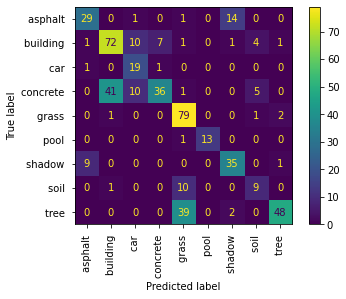

In [24]:
dt = DecisionTreeClassifier(min_samples_split = 19, min_samples_leaf = 1, max_depth = 10, criterion = 'entropy', min_weight_fraction_leaf = 0.025)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

print(metrics.classification_report(y_test, dt_pred, digits = 4))

plt.figure(figsize = (15,15))
metrics.plot_confusion_matrix(dt, x_test, y_test, xticks_rotation = 'vertical')